In [1]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [2]:
!python --version




Python 3.11.13


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#normalize
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255
#conversion to hot vector
y_train= to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [5]:
#build model
model= Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(10,activation="softmax")
])
##compile
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
##Train
model.fit(x_train,y_train,epochs=5,batch_size=128,validation_split=0.1)
#evaluate
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

Epoch 1/5


c:\Users\yesha\miniconda3\envs\ml_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8999 - loss: 0.3544 - val_accuracy: 0.9645 - val_loss: 0.1370
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9588 - loss: 0.1429 - val_accuracy: 0.9688 - val_loss: 0.1139
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9700 - loss: 0.1013 - val_accuracy: 0.9738 - val_loss: 0.0944
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9767 - loss: 0.0761 - val_accuracy: 0.9762 - val_loss: 0.0876
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9821 - loss: 0.0601 - val_accuracy: 0.9757 - val_loss: 0.0853
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9747 - loss: 0.0803
Test accuracy: 0.9746999740600586


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
predicted:  7


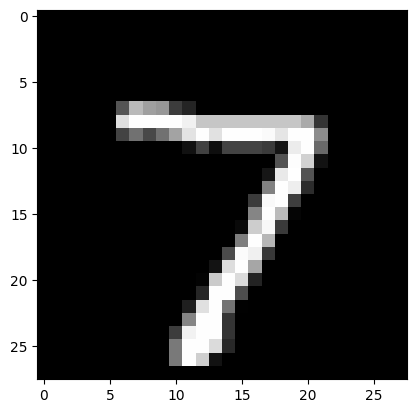

In [6]:
##predict one digit
pred=model.predict(x_test[:1])
print("predicted: ",np.argmax(pred))
plt.imshow(x_test[0].reshape(28,28),cmap='gray')
plt.show()